In [1]:
import numpy as np

In [2]:
@interact(n=slider(1, 20, 1, default=2))
def steepness(n):
    sigmoid(G) = 1/(1 + G^n)
    p = plot(sigmoid(G), (G, 0, 3), thickness=2)
    p += text(r"$f(G) = \dfrac{1}{1 + G^{" + str(n) + "}}$", (2, 1), color="black", fontsize=16)
    p.show(ymin=0, ymax=1.3, axes_labels=("$G$", "Production rate of $H$"))

Interactive function <function steepness at 0x7f17f77df2f0> with 1 widget
  n: TransformIntSlider(value=2, des…

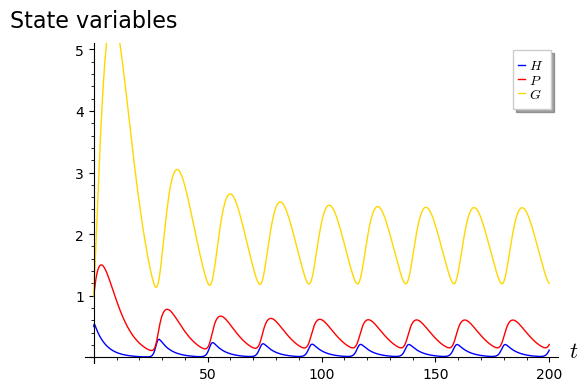

In [3]:
state_vars = list(var("H, P, G"))
n = 12
system = (
    1/(1 + G^n) - 0.2*H,
    H - 0.2*P,
    P - 0.2*G,
)
field(H, P, G) = system

initial_state = (0.5, 1, 1)
t_range = srange(0, 200, 0.05)
solution = desolve_odeint(field, initial_state, t_range, state_vars)
solution = np.insert(solution, 0, t_range, axis=1)
p  = list_plot(solution[:,(0,1)], plotjoined=True, color="blue", legend_label="$H$")
p += list_plot(solution[:,(0,2)], plotjoined=True, color="red",  legend_label="$P$")
p += list_plot(solution[:,(0,3)], plotjoined=True, color="gold", legend_label="$G$")
p.show(ymin=0, ymax=5, axes_labels=("$t$", "State variables"))


In [4]:
initial_state = (0.5, 1, 1)
t_range = srange(0, 300, 0.05)
spiralin = desolve_odeint(field, initial_state, t_range, state_vars)
p = list_plot(spiralin, plotjoined=True, color="red")
p.show(frame=False, aspect_ratio=(1, 1, 1/4))


Graphics3d Object

In [5]:
G0 = find_root(1/(1 + G^n) - 0.008*G, 0, 100)
P0 = 0.2*G0
H0 = 0.2*P0

initial_state = (0.5, 1, 1)
t_range = srange(0, 300, 0.05)
spiralin = desolve_odeint(field, initial_state, t_range, state_vars)
p = list_plot(spiralin, plotjoined=True, color="red")
spiralout = desolve_odeint(field, (H0 + 0.03, P0 + 0.03, G0 + 0.03), t_range, state_vars)
p += list_plot(spiralout, plotjoined=True, color="fuchsia")
p += list_plot(spiralin[-500:], plotjoined=True, color="blue", thickness=4)
#p += point((H0, P0, G0), size=7, color="purple")
p.show(frame=False, aspect_ratio=(1, 1, 1/4))


Graphics3d Object